## Bike Share in Washingtion D.C.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# To see all the columns after doing Feature Engineering, otherwise normally it displays only few columns.
pd.options.display.max_columns = 999

## Get the Data

In [2]:
bike = pd.read_csv('./data/train.csv', parse_dates=True, index_col=0)
bike.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-06-06 01:00:00,2,0,1,1,21.32,25.000,68,0.0000,6,21,27
2012-11-02 03:00:00,4,0,1,1,12.30,15.150,70,11.0014,0,3,3
2011-12-15 03:00:00,4,0,1,2,13.12,16.665,70,8.9981,1,2,3
2011-12-17 20:00:00,4,0,0,1,9.02,10.605,69,16.9979,7,99,106
2011-08-04 11:00:00,3,0,1,2,30.34,34.850,66,15.0013,37,112,149


In [3]:
# Displays number of rows and columns of our DataFrame

bike.shape

(10886, 11)

In [4]:
# Parsing the datetime 

bike['hour'] = bike.index.hour
bike['month'] = bike.index.month
bike['DayOfWeek'] = bike.index.day_name()
bike.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,DayOfWeek
datetime,,,,,,,,,,,,,,
2011-11-16 07:00:00,4,0,1,3,18.86,22.725,94,0.0000,7,130,137,7,11,Wednesday
2012-11-05 08:00:00,4,0,1,2,12.30,14.395,49,15.0013,19,629,648,8,11,Monday
2012-02-02 02:00:00,1,0,1,2,17.22,21.210,67,8.9981,2,7,9,2,2,Thursday
2012-08-14 13:00:00,3,0,1,1,32.80,36.365,46,6.0032,83,203,286,13,8,Tuesday
2011-08-15 02:00:00,3,0,1,2,24.60,28.030,83,0.0000,0,3,3,2,8,Monday


In [5]:
bike.shape

(10886, 14)

In [6]:
# Displays Statistical Information

bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000


In [7]:
# Displays "DataType" information

bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  DayOfWeek   10886 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 1.2+ MB


In [8]:
# Displays unique values

bike.apply(lambda x: len(x.unique()))

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
hour           24
month          12
DayOfWeek       7
dtype: int64

## Preprocessing Data

In [9]:
# Check for NaN/null values in the DataFrame

bike.isna().sum()
# bike.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
month         0
DayOfWeek     0
dtype: int64

## Visualizing the Data

### Correlation Matrix

In [10]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451


<AxesSubplot:>

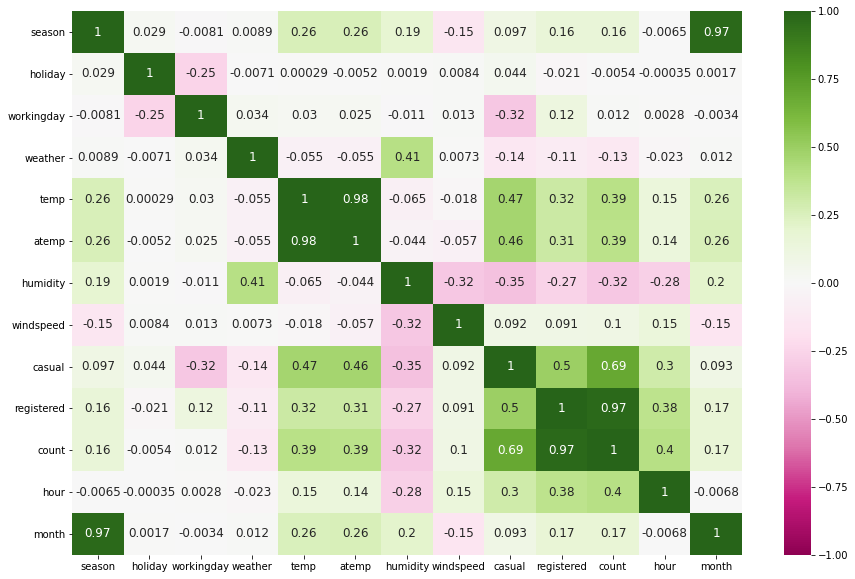

In [11]:
corr = bike.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            vmin=-1, 
            vmax=1, 
            cmap="PiYG", 
            annot=True, 
            annot_kws={'size':12},
            )

Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')

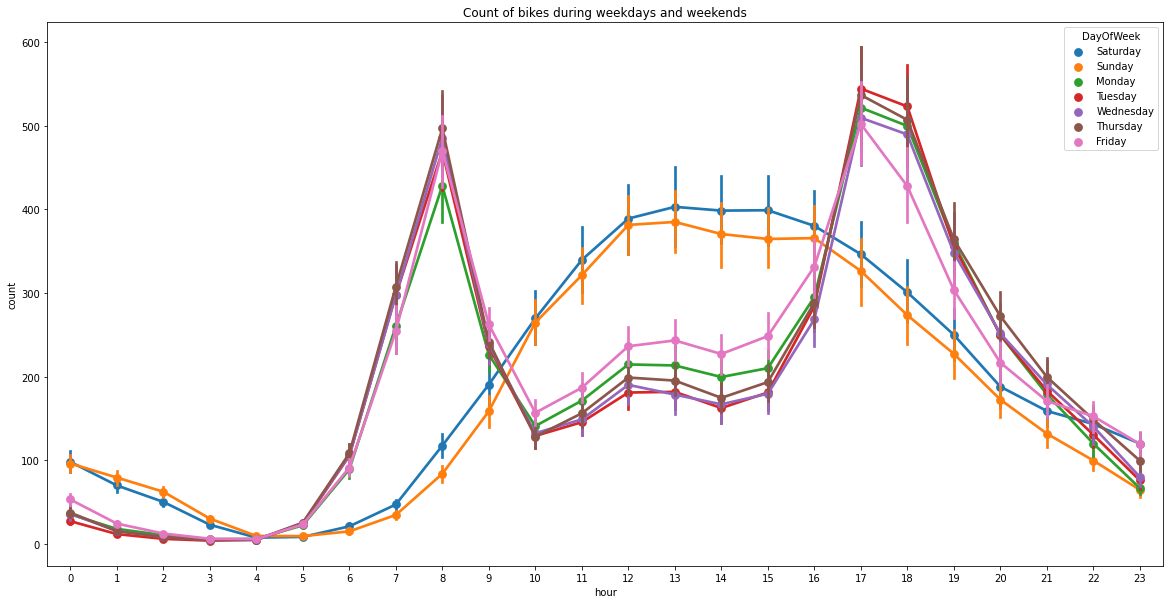

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=bike, x='hour', y='count', hue='DayOfWeek', ax=ax)
plt.title('Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

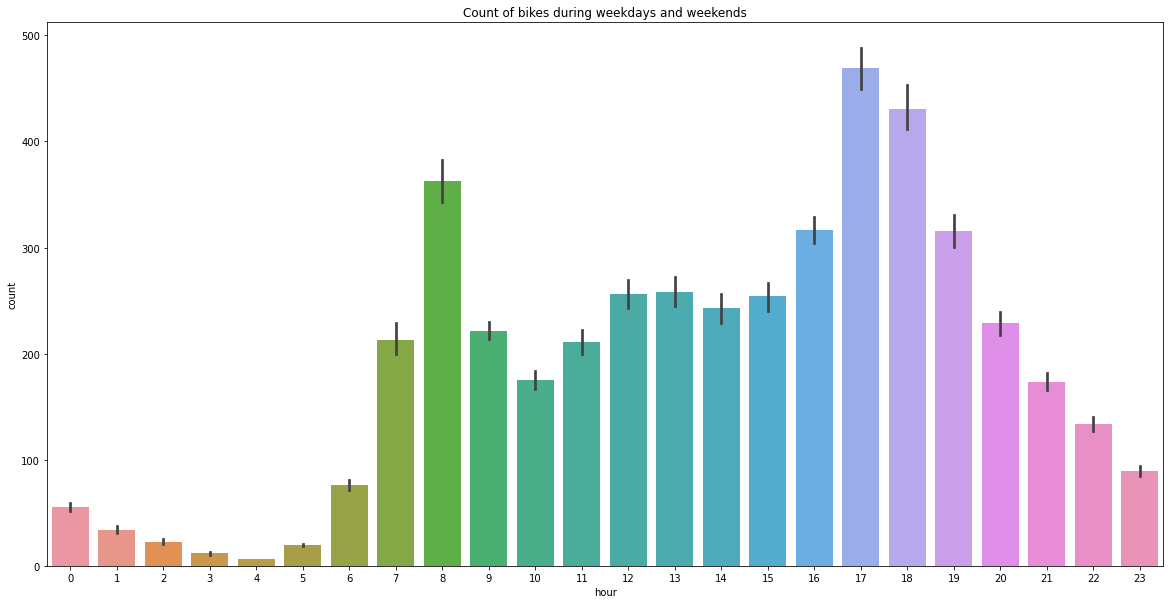

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=bike, x='hour', y='count')
ax.set(title='Count of bikes during weekdays and weekends')

In [14]:
bike_workday = bike.groupby('workingday').agg({'casual':'sum','registered': 'sum'})
bike_workday.rename(index={0: 'Not WorkDay',1: 'WorkDay'}, inplace=True)

bike_workday

,casual,registered
workingday,,
Not WorkDay,206037,448835
WorkDay,186098,1244506


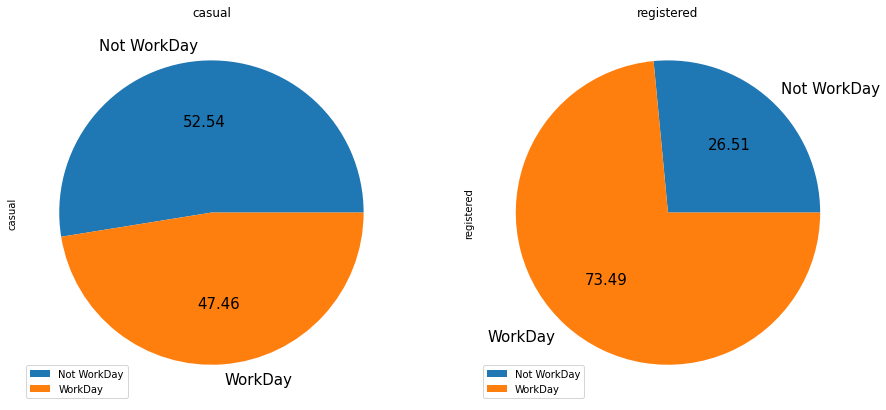

In [15]:
f, axes = plt.subplots(1,2, figsize=(15,10))

for ax, col in zip(axes, bike_workday.columns):
    bike_workday[col].plot(kind='pie', autopct='%.2f', ax=ax, title=col, fontsize=15)
    ax.legend(loc=3)

Text(0.5, 1.0, 'Count of Bikes during different months.')

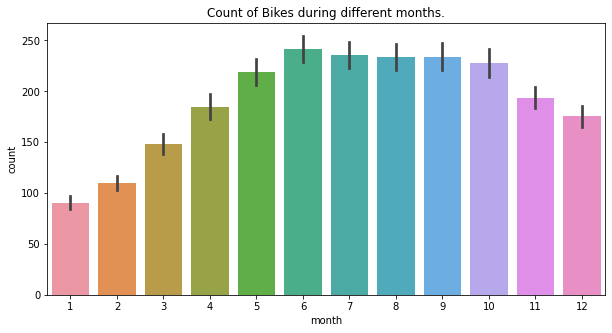

In [16]:
fig = plt.subplots(figsize=(10, 5))
sns.barplot(data=bike, x='month', y='count')
plt.title("Count of Bikes during different months.")

Text(0.5, 1.0, 'Count of Bikes during different Days.')

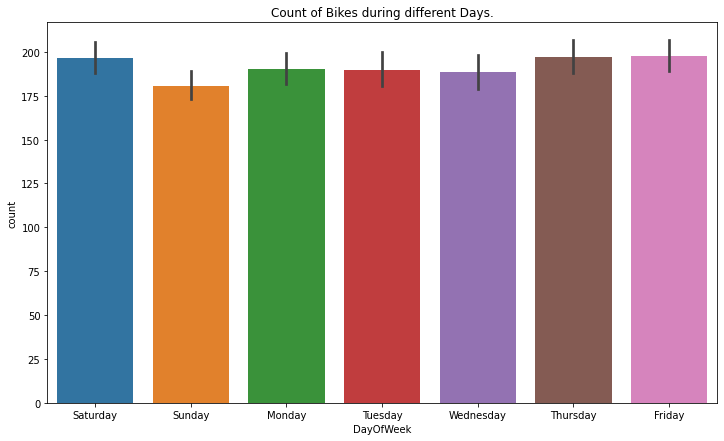

In [17]:
fig = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike, x='DayOfWeek', y='count')
plt.title("Count of Bikes during different Days.")

Text(0.5, 1.0, 'Count of Bikes during different Seasons of the year.')

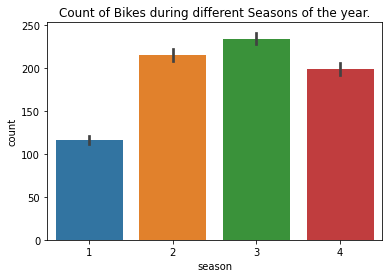

In [18]:
sns.barplot(x='season', y='count', data=bike)
plt.title("Count of Bikes during different Seasons of the year.")

Text(0.5, 1.0, 'Relation between Humidity and Users')

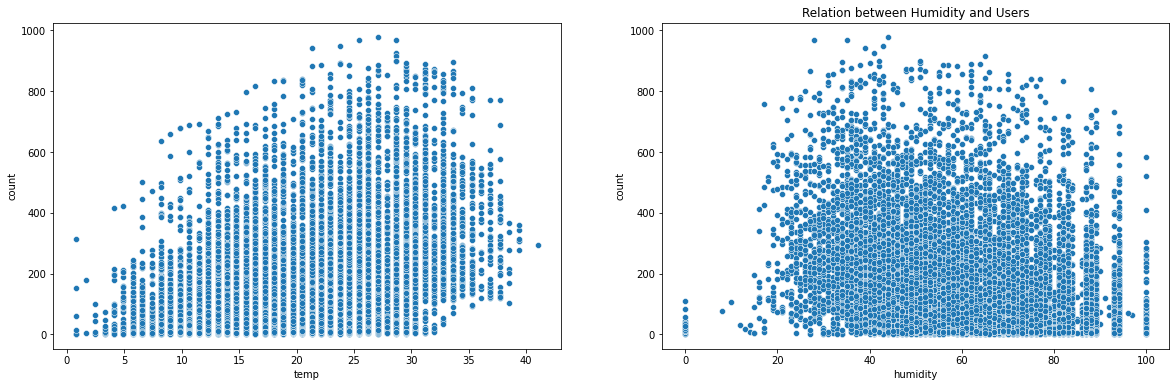

In [19]:
# Realtion between Temperature and Humidity for Usage

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))   # ax1, ax2 - Temperature and Humidity

# Temperature and Users, when Temperature increases, no.of Users also increases
sns.scatterplot(x=bike['temp'], y=bike['count'], ax=ax1)
plt.title('Relation between Temperature and Users')

# Humidity and Users , when Humidity increases no.of Users decreases.
sns.scatterplot(x=bike['humidity'], y=bike['count'], ax=ax2)
plt.title('Relation between Humidity and Users')  

### Select columns for Feature Matrix (X) and target(y)

In [20]:
X = bike[['holiday', 'workingday', 'temp', 'windspeed', 'season', 'weather', 'DayOfWeek', 'month', 'hour']]
y = bike['count']

In [21]:
X.head()

,holiday,workingday,temp,windspeed,season,weather,DayOfWeek,month,hour
datetime,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,0.0,1,1,Saturday,1,0
2011-01-01 01:00:00,0,0,9.02,0.0,1,1,Saturday,1,1
2011-01-01 02:00:00,0,0,9.02,0.0,1,1,Saturday,1,2
2011-01-01 03:00:00,0,0,9.84,0.0,1,1,Saturday,1,3
2011-01-01 04:00:00,0,0,9.84,0.0,1,1,Saturday,1,4


### Splitting data into train and test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
X_train.shape, X_test.shape

((8164, 9), (2722, 9))

### Feature Engineering

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [25]:
scaling_and_polynomial = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False)
)

In [26]:
fe_eng = ColumnTransformer([
    ('Scaling', scaling_and_polynomial, ['temp', 'windspeed']),
    ('do-nothing', 'passthrough', ['holiday', 'workingday']),
    ('One-Hot-Encoding', OneHotEncoder(handle_unknown = 'ignore'), ['season', 'weather', 'DayOfWeek', 'month', 'hour'])  
])

## Model selection

In [27]:
model = make_pipeline(
    fe_eng,
    Ridge()
)

In [28]:
model[0]

ColumnTransformer(transformers=[('Scaling',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['temp', 'windspeed']),
                                ('do-nothing', 'passthrough',
                                 ['holiday', 'workingday']),
                                ('One-Hot-Encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['season', 'weather', 'DayOfWeek', 'month',
                                  'hour'])])

In [29]:
# fit and transform the Training data
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['temp', 'windspeed']),
                                                 ('do-nothing', 'passthrough',
                                                  ['holiday', 'workingday']),
                                                 ('One-Hot-Encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'weather',
                                                   'DayOfWeek', 'mon

In [30]:
# Features after transformation

model[0].transform(X_train).shape

(8164, 57)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8164 entries, 2011-09-15 17:00:00 to 2012-08-14 22:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     8164 non-null   int64  
 1   workingday  8164 non-null   int64  
 2   temp        8164 non-null   float64
 3   windspeed   8164 non-null   float64
 4   season      8164 non-null   int64  
 5   weather     8164 non-null   int64  
 6   DayOfWeek   8164 non-null   object 
 7   month       8164 non-null   int64  
 8   hour        8164 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 637.8+ KB


In [32]:
X_test

,holiday,workingday,temp,windspeed,season,weather,DayOfWeek,month,hour
datetime,,,,,,,,,
2012-10-01 04:00:00,0,1,17.22,7.0015,4,1,Monday,10,4
2012-11-18 09:00:00,0,0,13.12,16.9979,4,1,Sunday,11,9
2012-07-04 07:00:00,1,0,27.88,0.0000,3,1,Wednesday,7,7
2012-01-06 08:00:00,0,1,9.84,8.9981,1,1,Friday,1,8
2012-11-03 06:00:00,0,0,13.12,12.9980,4,2,Saturday,11,6
...,...,...,...,...,...,...,...,...,...
2012-08-05 20:00:00,0,0,28.70,7.0015,3,1,Sunday,8,20
2011-12-05 07:00:00,0,1,13.12,0.0000,4,1,Monday,12,7
2012-02-05 14:00:00,0,0,12.30,11.0014,1,1,Sunday,2,14


In [33]:
# Transforming and Predicting Test data

y_pred = model.predict(X_test)

In [34]:
y_pred.max(), y_pred.min()

(619.9312040293885, -198.75888430779418)

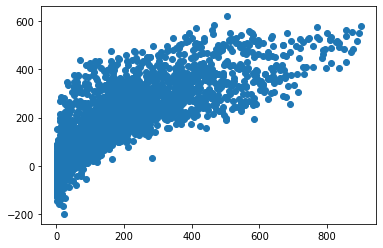

In [35]:
plt.scatter(y_test, y_pred)

In [36]:
metrics.mean_absolute_error(y_test, y_pred)

80.36213434802983

In [37]:
# root mean squared log error
y_pred[y_pred<0] = 0
metrics.mean_squared_log_error(y_test, y_pred)**0.5

1.0754331902775551

## Kaggle

In [38]:
bike_test = pd.read_csv('./data/test.csv', parse_dates=True, index_col=0)
bike_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [39]:
bike_test.shape

(6493, 8)

In [40]:
# Parsing the datetime 

bike_test['hour'] = bike_test.index.hour
bike_test['month'] = bike_test.index.month
bike_test['DayOfWeek'] = bike_test.index.day_name()
bike_test.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,DayOfWeek
datetime,,,,,,,,,,,
2012-04-22 03:00:00,2,0,0,2,18.04,21.970,82,11.0014,3,4,Sunday
2011-07-21 18:00:00,3,0,1,1,36.90,44.695,50,19.0012,18,7,Thursday
2012-07-29 08:00:00,3,0,0,1,28.70,32.575,65,15.0013,8,7,Sunday
2011-07-27 19:00:00,3,0,1,1,32.80,34.850,29,6.0032,19,7,Wednesday
2011-04-26 07:00:00,2,0,1,1,23.78,27.275,83,19.9995,7,4,Tuesday


In [41]:
X_kaggle = bike_test[['holiday', 'workingday', 'temp', 'windspeed', 'season', 'weather', 'DayOfWeek', 'month', 'hour']]
X_kaggle.head()

,holiday,workingday,temp,windspeed,season,weather,DayOfWeek,month,hour
datetime,,,,,,,,,
2011-01-20 00:00:00,0,1,10.66,26.0027,1,1,Thursday,1,0
2011-01-20 01:00:00,0,1,10.66,0.0000,1,1,Thursday,1,1
2011-01-20 02:00:00,0,1,10.66,0.0000,1,1,Thursday,1,2
2011-01-20 03:00:00,0,1,10.66,11.0014,1,1,Thursday,1,3
2011-01-20 04:00:00,0,1,10.66,11.0014,1,1,Thursday,1,4


In [42]:
bike_test.reset_index(inplace=True)

In [43]:
# Prediction

y_pred = model.predict(X_kaggle)
y_pred

array([-35.39996239, -31.7091488 , -42.44887683, ..., 106.27479337,
        69.11162724,  31.88665093])

In [44]:
y_pred[y_pred<0] = 0
y_pred

array([  0.        ,   0.        ,   0.        , ..., 106.27479337,
        69.11162724,  31.88665093])

In [45]:
output = pd.DataFrame({'datetime': bike_test['datetime'], 'count': y_pred})
output.to_csv('./bike_kaggle_submission/bike_kaggle_submission.csv', index=False)